### Base Learner 5

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2

from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path}
default_params.update(my_params)

In [3]:
set_seed(42)

In [4]:
train_dl, learn = run_exp(default_params, 'dummy', b_ret=True,
                          b_testset_logger=True )

In [5]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,2.035525,0.166896,0.951219,0.996516,0.954704,00:12
1,0.927814,0.029467,0.993031,0.998258,0.993031,00:10
2,0.527179,0.017993,0.994774,1.000000,0.996516,00:10
3,0.377658,0.015557,0.993031,0.998258,0.996516,00:10
4,0.282305,0.003648,0.998258,0.998258,0.998258,00:10
5,0.238716,0.002747,0.998258,0.998258,0.998258,00:10
6,0.201685,0.004665,0.996516,0.998258,0.996516,00:10
7,0.150982,0.006428,0.996516,0.998258,0.996516,00:10
8,0.135638,0.006362,0.996516,0.998258,0.996516,00:10
9,0.140082,0.006139,0.996516,0.998258,0.996516,00:10


In [6]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,1.514243,0.521930,0.921053,0.600877
1,1.481977,0.592105,0.912281,0.684211
2,1.233375,0.653509,0.934211,0.714912
3,1.227663,0.627193,0.938596,0.697368
4,0.993416,0.692982,0.951754,0.745614
5,0.997622,0.692982,0.964912,0.741228
6,0.822157,0.741228,0.947368,0.802632
7,0.800383,0.701754,0.960526,0.767544
8,0.786314,0.719298,0.938596,0.793860
9,0.759224,0.732456,0.964912,0.776316


In [8]:
old_path = learn.path
learn.path = Path('../models')
learn.export('resnet50-fit10-0.pkl')
learn.path = old_path

### Reload Model

In [9]:
from modules.learnutils import learner_add_testset_2

In [10]:
learn = load_learner('../models/resnet50-fit10-0.pkl')

In [11]:
learn.path = old_path

In [12]:
learn.path

Path('../../../rf-chess-data/cropped_v1.1')

In [13]:
train_dl, _ = run_exp(default_params, 'dummy', b_ret=True,
                          b_testset_logger=True )

In [14]:
learn.dls = train_dl

In [15]:
learn.dls[0].items[0]

Path('../../../rf-chess-data/cropped_v1.1/02291_black-king.jpg')

In [16]:
learner_add_testset_2(learn, test_path_all, b_cuda=True)

### First Pass

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=7.585775847473997e-07)

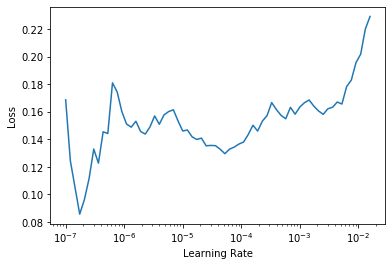

In [17]:
set_seed(42)
learn.lr_find()

In [18]:
set_seed(42)
with learn.no_logging():
    learn.fine_tune(10)

In [19]:
pd.DataFrame(learn.cbs[3].values).iloc[-12:,:]

,0,1,2,3
10,NaN,NaN,NaN,NaN
11,0.874475,0.745614,0.964912,0.807018
12,0.705188,0.785088,0.978070,0.815789
13,0.877337,0.745614,0.951754,0.815789
14,0.870674,0.771930,0.960526,0.815789
15,0.721224,0.771930,0.960526,0.828947
16,0.601009,0.824561,0.964912,0.859649
17,0.465289,0.846491,0.978070,0.877193
18,0.347981,0.881579,0.978070,0.903509
19,0.311348,0.907895,0.991228,0.921053


In [20]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

In [21]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

In [22]:
interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       0.92      0.61      0.73        18
  black-king       0.78      0.95      0.86        19
black-knight       0.86      0.95      0.90        19
  black-pawn       0.95      1.00      0.97        19
 black-queen       1.00      0.85      0.92        20
  black-rook       0.94      0.89      0.92        19
white-bishop       0.84      0.84      0.84        19
  white-king       1.00      0.79      0.88        19
white-knight       0.82      0.95      0.88        19
  white-pawn       0.86      1.00      0.93        19
 white-queen       0.93      0.74      0.82        19
  white-rook       0.79      1.00      0.88        19

    accuracy                           0.88       228
   macro avg       0.89      0.88      0.88       228
weighted avg       0.89      0.88      0.88       228



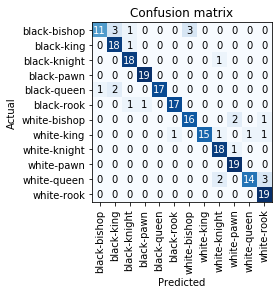

In [23]:
interp.plot_confusion_matrix()

### First Pass Part - 2

In [24]:
set_seed(42)
with learn.no_logging():
    learn.fine_tune(5, base_lr=1e-5)

In [25]:
pd.DataFrame(learn.cbs[3].values).iloc[-7:,:]

,0,1,2,3
22,0.296278,0.881579,0.978070,0.912281
23,0.275816,0.912281,0.986842,0.921053
24,0.283550,0.899123,0.991228,0.916667
25,0.291828,0.899123,0.986842,0.921053
26,0.313462,0.907895,0.986842,0.925439
27,0.289048,0.907895,0.982456,0.929825
28,0.303481,0.903509,0.986842,0.921053


In [27]:
easy_test_dl = learn.dls.test_dl(get_image_files(test_path_easy), 
                                 with_labels=True)

In [28]:
interp = ClassificationInterpretation.from_learner(learn, 
                                                  dl = easy_test_dl)

In [29]:
interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       0.93      0.78      0.85        18
  black-king       0.82      0.95      0.88        19
black-knight       0.86      0.95      0.90        19
  black-pawn       0.95      1.00      0.97        19
 black-queen       1.00      0.85      0.92        20
  black-rook       0.94      0.89      0.92        19
white-bishop       0.94      0.89      0.92        19
  white-king       0.94      0.89      0.92        19
white-knight       0.82      0.95      0.88        19
  white-pawn       0.90      1.00      0.95        19
 white-queen       1.00      0.68      0.81        19
  white-rook       0.83      1.00      0.90        19

    accuracy                           0.90       228
   macro avg       0.91      0.90      0.90       228
weighted avg       0.91      0.90      0.90       228



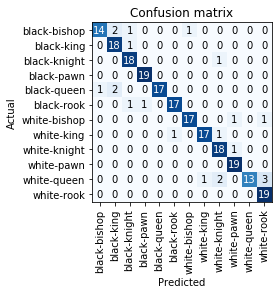

In [30]:
interp.plot_confusion_matrix()

### First Pass Part - 3

In [31]:
set_seed(42)
with learn.no_logging():
    learn.fine_tune(5, base_lr=1e-5)

pd.DataFrame(learn.cbs[3].values).iloc[-7:,:]

,0,1,2,3
29,0.303481,0.903509,0.986842,0.921053
30,0.274635,0.916667,0.986842,0.934211
31,0.298114,0.921053,0.991228,0.925439
32,0.324032,0.894737,0.991228,0.907895
33,0.281617,0.912281,0.991228,0.925439
34,0.305224,0.899123,0.986842,0.921053
35,0.302623,0.903509,0.986842,0.925439


### Look at Validation

In [34]:
learn.cbs.pop(3)

TestSetRecorder

In [35]:
interp = ClassificationInterpretation.from_learner(learn, ds_idx=1)

In [36]:
interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       1.00      1.00      1.00        21
  black-king       1.00      1.00      1.00        32
black-knight       1.00      1.00      1.00        43
  black-pawn       1.00      1.00      1.00       136
 black-queen       1.00      1.00      1.00        20
  black-rook       1.00      1.00      1.00        35
white-bishop       1.00      1.00      1.00        31
  white-king       1.00      1.00      1.00        24
white-knight       1.00      1.00      1.00        42
  white-pawn       1.00      1.00      1.00       131
 white-queen       1.00      1.00      1.00        22
  white-rook       1.00      1.00      1.00        37

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



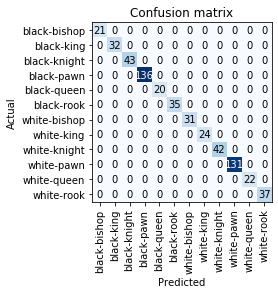

In [37]:
interp.plot_confusion_matrix()

In [38]:
interp = ClassificationInterpretation.from_learner(learn, ds_idx=0)

In [39]:
interp.print_classification_report()

              precision    recall  f1-score   support

black-bishop       0.98      0.99      0.99       117
  black-king       0.98      1.00      0.99       116
black-knight       0.99      0.97      0.98       158
  black-pawn       1.00      1.00      1.00       523
 black-queen       1.00      0.96      0.98        67
  black-rook       0.99      1.00      0.99       166
white-bishop       0.99      1.00      1.00       141
  white-king       1.00      0.96      0.98       126
white-knight       0.99      0.99      0.99       142
  white-pawn       0.99      1.00      0.99       508
 white-queen       0.97      0.98      0.97        88
  white-rook       0.99      0.99      0.99       144

    accuracy                           0.99      2296
   macro avg       0.99      0.99      0.99      2296
weighted avg       0.99      0.99      0.99      2296



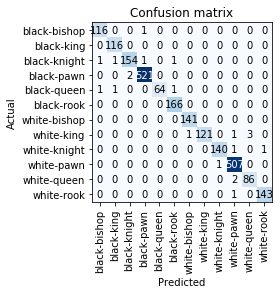

In [40]:
interp.plot_confusion_matrix()

### Look at Normalize

In [73]:
norm0 = learn.dls[0].after_batch[3]
norm1 = learn.dls[1].after_batch[3]
norm2 = learn.dls[2].after_batch[3]

In [77]:
norm0.mean

tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0')

In [78]:
norm1.mean

tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0')

In [84]:
s = train_dl.train.sample()

In [89]:
tmp = train_dl.train_ds

In [98]:
x = L([[1,2,3],[4,5,6]])

In [99]:
x.itemgot(2)

(#2) [3,6]

In [154]:
tmp = []
for i in range(200):
    x,y = train_dl.train.one_batch()
    m0 = x.mean(0).mean(1).mean(1).cpu().numpy().tolist()
    tmp.append(m0)

In [153]:
tensor(tmp).mean(0)

tensor([-0.0849,  0.1119,  0.0337])

In [155]:
tensor(tmp).mean(0)

tensor([-0.0469,  0.1522,  0.0727])

In [143]:
tmp = []
for i in range(100):
    x,y = train_dl.valid.one_batch()
    m0 = x.mean(0).mean(1).mean(1).cpu().numpy().tolist()
    tmp.append(m0)

In [142]:
tensor(tmp).mean(0)

tensor([-0.0105,  0.2085,  0.0193])

In [144]:
tensor(tmp).mean(0)

tensor([-0.0105,  0.2085,  0.0193])

In [150]:
tmp = []
for i in range(100):
    x,y = easy_test_dl.one_batch()
    m0 = x.mean(0).mean(1).mean(1).cpu().numpy().tolist()
    tmp.append(m0)

In [149]:
tensor(tmp).mean(0)

tensor([0.1609, 0.2663, 0.2650])

In [151]:
tensor(tmp).mean(0)

tensor([0.1609, 0.2663, 0.2650])

In [108]:
torch.mean(x.shape, 1, keepdim=True)

TypeError: mean() received an invalid combination of arguments - got (torch.Size, int, keepdim=bool), but expected one of:
 * (Tensor input, torch.dtype dtype)
 * (Tensor input, tuple of names dim, bool keepdim, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of ints dim, bool keepdim, torch.dtype dtype, Tensor out)


In [91]:
tmp[:,0]

TypeError: int() argument must be a string, a bytes-like object or a number, not 'slice'

In [86]:
[s for s in train_dl.train.sample()]

[1255,
 1878,
 1231,
 1006,
 588,
 1104,
 295,
 959,
 1390,
 892,
 348,
 317,
 9,
 674,
 229,
 967,
 1849,
 1893,
 1941,
 231,
 1322,
 1593,
 1107,
 125,
 1164,
 1679,
 500,
 168,
 1998,
 849,
 1619,
 974,
 298,
 725,
 363,
 1786,
 1537,
 584,
 1206,
 778,
 1195,
 591,
 1645,
 1507,
 795,
 440,
 576,
 830,
 1246,
 481,
 524,
 1124,
 1923,
 353,
 293,
 1111,
 977,
 268,
 61,
 1770,
 1921,
 193,
 749,
 1798,
 865,
 478,
 1532,
 1281,
 1304,
 314,
 95,
 1918,
 1454,
 1325,
 1800,
 1144,
 1217,
 553,
 876,
 1068,
 379,
 2250,
 732,
 1355,
 816,
 1792,
 1078,
 195,
 1233,
 131,
 1423,
 451,
 199,
 307,
 139,
 438,
 563,
 521,
 226,
 290,
 1425,
 1840,
 667,
 982,
 407,
 1749,
 1004,
 1301,
 20,
 1378,
 1209,
 422,
 1497,
 79,
 154,
 1070,
 623,
 1551,
 449,
 2276,
 715,
 1825,
 2043,
 107,
 1053,
 1522,
 147,
 165,
 874,
 1924,
 302,
 1847,
 1651,
 936,
 110,
 1875,
 1189,
 2041,
 978,
 1997,
 2186,
 1388,
 776,
 1582,
 1298,
 284,
 2222,
 1389,
 275,
 1127,
 151,
 2253,
 815,
 2024,
 570,


In [80]:
norm2.

(#2) ['mean','std']

In [79]:
norm2.mean

tensor([[[[0.4850]],

         [[0.4560]],

         [[0.4060]]]], device='cuda:0')

### Attempt Blur

In [43]:
from fastai2.medical.imaging import uniform_blur2d

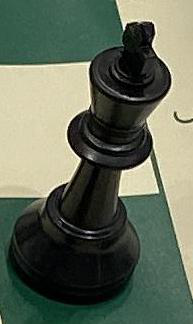

In [51]:
img = Image.open(train_dl.train.items[0]); img

In [53]:
b = train_dl.one_batch()

In [55]:
b[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
b.itemgot(0)

In [69]:
# uniform_blur2d(b[0][0].unsqueeze(0), 1)
uniform_blur2d(b[0][0], 10)

RuntimeError: Given groups=1, weight of size 1 1 1 10, expected input[1, 3, 128, 128] to have 1 channels, but got 3 channels instead

In [62]:
t_img = b[0][0]

In [63]:
t_img.shape

torch.Size([3, 128, 128])

In [65]:
t_img.unsqueeze(0).shape

torch.Size([1, 3, 128, 128])

In [44]:
uniform_blur2d()

<function fastai2.medical.imaging.uniform_blur2d(x, s)>